# Textual Analysis of Country Music
Code to accompany [blog post](https://craha.wordpress.com/2018/01/16/a-textual-analysis-of-country-music-wip/). Not including web scraper to fetch data here. 

If you prefer metal to country music, take a look at [this.](http://www.degeneratestate.org/posts/2016/Apr/20/heavy-metal-and-natural-language-processing-part-1/)

Generating lyrics is the next step I'll be taking in this analysis

In [ ]:
#Loading my dataset here, given a pickle of lyric data. 
import urllib2
from bs4 import BeautifulSoup
from random import *
import time
import cPickle

with open("lyricsArray.pickle", "rb") as output_file:
    loadtest = cPickle.load(output_file)
    
lyricsToProcess = loadtest

In [57]:
##Preview one of the lyrics in the array, note this much more than just lyrics!
##Lots of HTML mixed in
lyricsToProcess[1]

<td align="center" valign="top"> \n            <h1 class="txt">\n                Give It All We Got Tonight lyrics - <a href="/lyrics/strait-george.html"><font color="#333333">George Strait</font></a>\n            </h1>\n            <a href="http://redirect.jango.com/ad=pid_ST3_aid_jangoplayer/www.jango.com/music/George%20Strait/Give%20It%20All%20We%20Got%20Tonight" id="clickme" target="_blank" title="Click to play this song!">\n<img alt="Click to play this song!" border="0" height="17" id="play" src="/images/play26.gif" width="26"/></a>            <script type="text/javascript">\n                /* Above ToneFuse */\n\n                (function() {\n                    var opts = {\n                        artist: ArtistName,\n                        song: SongName,\n                        genre: "",\n                        adunit_id: 39382131,\n                        div_id: "cf_async_" + Math.floor((Math.random() * 999999999)),\n                        hostname: "srv.clickfuse.co

In [ ]:
##These were the consistent delimiters I could find!
##To Get Artist Text
#print lyricsToProcess[565].find("font").findAll(text=True)[0]
##To Get Song Name Text
#print lyricsToProcess[565].find("h1").findAll(text=True)[0].strip().split(" lyrics -")[0]
##To Get Lyrics!
##print str(lyricsToProcess[565]).split("<br/><br/>\n")[1].strip().split("<br/>\n            <br/>\n")[0].replace("<br/>",'')

In [ ]:
##Second Obj will be start of lyrics
#print teststring.split("<br/><br/>\n")
##Second Obj will be start of song
#print teststring.split("""<h1 class="txt">\n """)
##Second Obj will be start of artist
#print teststring.split("""<font color="#333333">""")

In [58]:
#Get rid of some junk and chorus
processedLyrics = []
for idx in range(len(lyricsToProcess)):
    processedLyrics.append([lyricsToProcess[idx].find("font").findAll(text=True)[0],lyricsToProcess[idx].find("h1").findAll(text=True)[0].strip().split(" lyrics -")[0],str(lyricsToProcess[idx]).split("<br/><br/>\n")[1].strip().split("<br/>\n            <br/>\n")[0].replace("<br/>",'')])
for idx, lyric in enumerate(processedLyrics):
    lyric[2] = lyric[2].split("[Thanks")[0]
    lyric[2] = lyric[2].split("""<script type=""")[0]
    lyric[2] = lyric[2].replace("\n\nChorus:", '')
    lyric[2] = lyric[2].replace("\n\nChorus x2", '')
    lyric[2] = lyric[2].replace("\n\nChorus x3", '')
    lyric[2] = lyric[2].replace("\n\nChorus", '')
    lyric[2] = lyric[2].replace("\n\nCHORUS", '')
    lyric[2] = lyric[2].replace("\n\nREPEAT CHORUS", '')
    lyric[2] = lyric[2].replace("\n\n(Chorus)", '')
    lyric[2] = lyric[2].replace("\n", ' ')
    lyric[2] = lyric[2].replace("repeat chorus", '')
    lyric[2] = lyric[2].replace("chorus", '')
    processedLyrics[idx] = lyric

In [59]:
#See some cleaned lyrics
print processedLyrics[6201]
print processedLyrics[2543]

[u'Hank Williams Jr', u"Women I've Ever Had", "I like to play my music and have good time I love to hear no train rolling down the line I am into happy and I don't like sad  I like to have women I never had   I'll take a little smoke and a lot of wine  I get high and I call old friends of mine I like the sweet young things and Old Grandad  And I like to have women I've never had  I like to ride my hoses and shoot my gun  You know a cowboy's work is just never done I am in to bacics and I don't like fads  And I like to have women I never had   Hey, I don't mean to ever do anybody no wrong I was just born the son of a singer of songs I do things that makes some people mad  And I like to have women I never had "]
[u'Willie Nelson', u"Alexander's Ragtime Band", "Come on along Come on along To Alexander's ragtime band Come on along Come on along It's the best band in my land  They can play a bugle call like you never heard before It's so natural that you want to go to war That's the bestest

In [61]:
#Run twice oddly, get rid of the songs that don't have lyrics
for index,lyric in enumerate(processedLyrics):
    if "NMPA" in lyric[2]:
        del processedLyrics[index]
for index,lyric in enumerate(processedLyrics):
    if lyric[1] in ["Nuages", "Kim","The Ballad of Nobeard", "Vous et Moi","Vous Et Moi", "Bon Voyage", "Huckleberry Jam","Down Yonder","Turf's Up","Departure", "American Offline"]:
        del processedLyrics[index]

In [62]:
len(processedLyrics)

9526

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn

%matplotlib inline

import tokenizerPM
from wordcloud import WordCloud
import nltk
from nltk import FreqDist

In [64]:
with open("stopwords.txt", "r") as f:
    STOP_WORDS = set(f.read().strip().split("\n"))

In [65]:
#Tokenized Song
tokenizerPM.tokenize_words(str(processedLyrics[0][2]).decode("ascii","ignore"))

[u'she',
 u'was',
 u'leaning',
 u'on',
 u'a',
 u'rail',
 u'in',
 u'a',
 u'cotton',
 u'dress',
 u'summer',
 u'tanned',
 u'pretty',
 u',',
 u'little',
 u'perfect',
 u'mess',
 u'with',
 u'a',
 u'story',
 u'that',
 u'could',
 u'only',
 u'be',
 u"anybody's",
 u'guess',
 u'and',
 u'i',
 u'was',
 u'thinking',
 u'that',
 u'i',
 u'probably',
 u"didn't",
 u'stand',
 u'a',
 u'chance',
 u'but',
 u'i',
 u'rolled',
 u'up',
 u'my',
 u'sleeves',
 u',',
 u'walked',
 u'up',
 u'and',
 u'i',
 u'said',
 u'hey',
 u',',
 u'i',
 u"don't",
 u'know',
 u'you',
 u'but',
 u"i'd",
 u'kinda',
 u'like',
 u'a',
 u'shot',
 u'she',
 u'said',
 u',',
 u'i',
 u'saw',
 u'you',
 u'comin',
 u'over',
 u',',
 u'i',
 u'already',
 u'thought',
 u'it',
 u'over',
 u'and',
 u'ok',
 u',',
 u'so',
 u'now',
 u'what',
 u'and',
 u'i',
 u'said',
 u',',
 u'well',
 u'i',
 u'got',
 u'a',
 u'car',
 u',',
 u'she',
 u'said',
 u',',
 u"there's",
 u'something',
 u'at',
 u'least',
 u"it's",
 u'a',
 u'start',
 u',',
 u'i',
 u'said',
 u',',
 u"it's",

In [84]:
countryWords = tokenizerPM.tokenize_words(" ".join(str(song[2]).decode("ascii","ignore") for song in processedLyrics))

In [85]:
countryFreqDist = FreqDist(countryWords)

In [86]:
#Most Frequent Words
countryFreqDist.most_common(10)

[(u'the', 82204),
 (u',', 80243),
 (u'i', 74904),
 (u'you', 64421),
 (u'and', 57585),
 (u'a', 55476),
 (u'to', 46219),
 (u'me', 31988),
 (u'in', 30962),
 (u'my', 28171)]

In [81]:
#Removing stopwords and punctuation
for stopword in STOP_WORDS:
    if stopword in countryFreqDist:
        del countryFreqDist[stopword]
        
for punct in tokenizerPM.CHARACTERS_TO_SPLIT:
    if punct in countryFreqDist:
        del countryFreqDist[punct]
        
if 'chorus' in countryFreqDist:
    del countryFreqDist['chorus']

In [87]:
#Common Cleaned Country Words
countryFreqDist.most_common(10)

[(u'the', 82204),
 (u',', 80243),
 (u'i', 74904),
 (u'you', 64421),
 (u'and', 57585),
 (u'a', 55476),
 (u'to', 46219),
 (u'me', 31988),
 (u'in', 30962),
 (u'my', 28171)]

In [88]:
#WordCloud Function
def plot_word_cloud(words, filename=None):
    wordcloud = WordCloud(
        width=800,
        height=600,
        max_words=500,
        scale=3,
    )
    wordcloud.generate_from_frequencies(dict(words))
    plt.figure(figsize=(15,20))
    plt.imshow(wordcloud)
    plt.axis("off")
    if filename is not None:
        plt.savefig(filename, bbox_inches='tight')    
    plt.show()

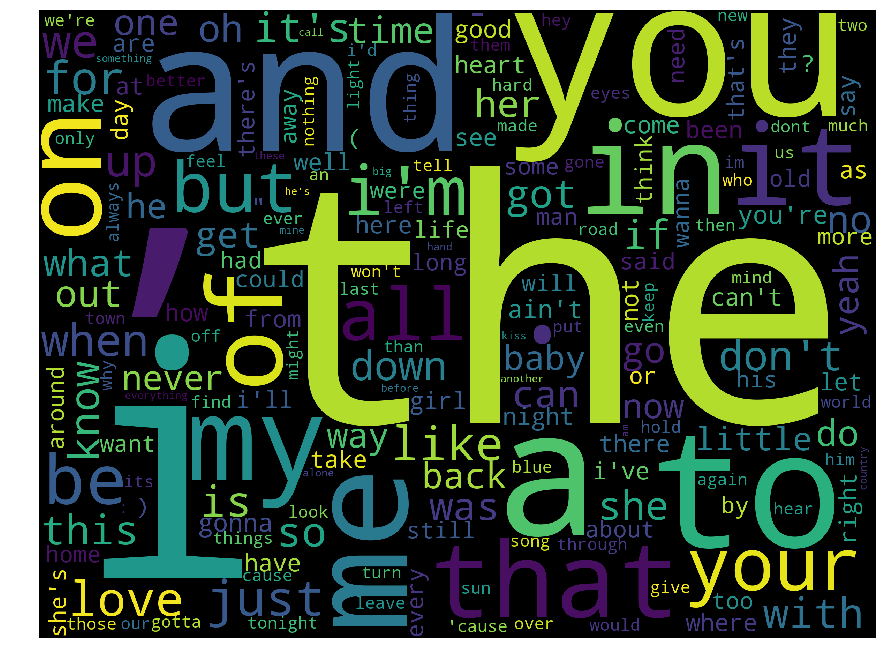

In [89]:
#Viz of most popular words, not impressive!
plot_word_cloud(countryFreqDist.most_common(200), "all-country-wordcloud.png")

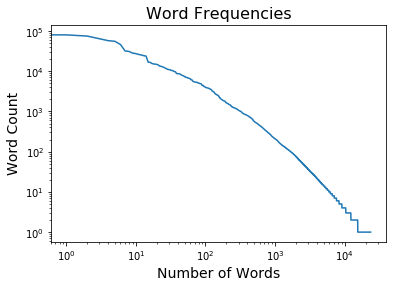

In [90]:
#Frequency Distribution!
country_word_freqs = [x[1] for x in countryFreqDist.most_common(200000)]
plt.plot(country_word_freqs)

plt.yscale("log")
plt.xscale("log")

plt.title("Word Frequencies", fontsize=16)
plt.ylabel("Word Count", fontsize=14)
plt.xlabel("Number of Words", fontsize=14)

In [74]:
#Log likelihood function to determine "uniqueness" of words and artists amongst a pool 
from math import log

#english words to compare with
english_freq_dist = FreqDist([w.lower() for w in nltk.corpus.brown.words()
                             if w not in STOP_WORDS])

#remove rare words
english_freq_dist = {k:v for k,v in english_freq_dist.items() if v > 5}
n_english = sum(english_freq_dist.values())

#remove rare country words
countryFreqDist = {k:v for k,v in countryFreqDist.items() if v > 5}
n_country = sum(countryFreqDist.values())

#combine
countryness = {}

for w in countryFreqDist.keys():
    if w in english_freq_dist.keys():
        if len(w) > 3:
            countryness[w] = log((countryFreqDist[w]/float(n_country))/(english_freq_dist[w]/float(n_english)))

In [75]:
sorted_ranked_country = [(x[0], x[1][0], "{:.2f}".format(x[1][1])) for x in
                       enumerate(sorted(countryness.items(), key=lambda x: -x[1]))]
sorted_ranked_country_dict = [(str(x[1]),int(100*float(x[2]))) for x in sorted_ranked_country]

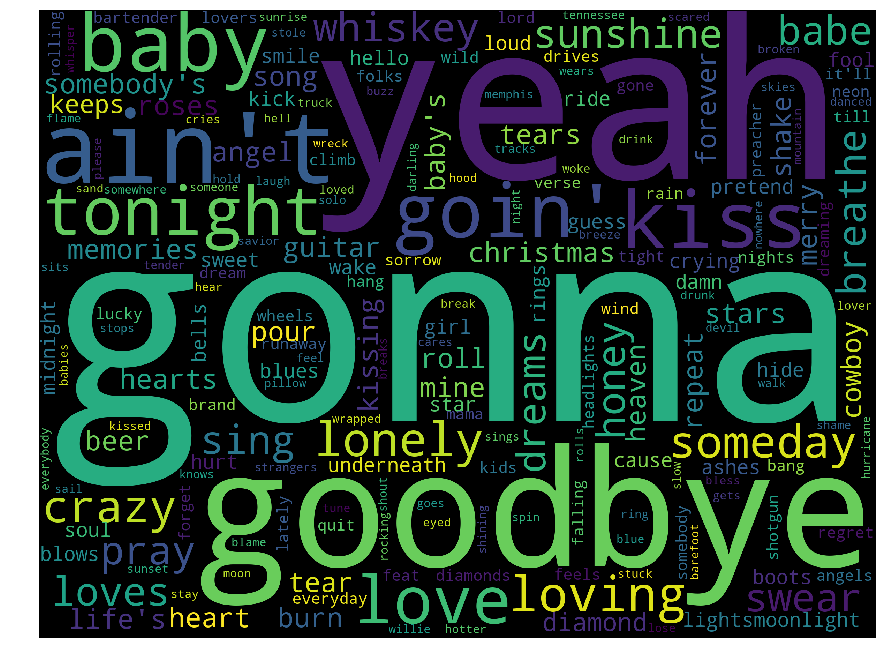

In [91]:
#Viz of most popular "country" words, impressive!
plot_word_cloud(sorted_ranked_country_dict[:200], "country-wordcloud.png")

In [92]:
#Handy funct for producing markdown tables
def list_to_markdown_table(lst, headings):
    assert(len(headings) == len(lst[0]))
    results = ""
    results += "|".join(headings) + "\n"
    results += "|".join(["---"] * len(headings)) + "\n"
    for elem in lst:
        results += "|".join([str(s) for s in elem]) + "\n"
        
    return results
headings = ['Rank', 'Word', 'Country-ness']

In [93]:
print list_to_markdown_table(sorted_ranked_country[:-20:-1],headings)

Rank|Word|Country-ness
---|---|---
4237|general|-4.71
4236|several|-4.44
4235|thus|-4.40
4234|national|-4.30
4233|states|-4.14
4232|also|-4.13
4231|experience|-4.12
4230|system|-3.92
4229|however|-3.87
4228|military|-3.86
4227|information|-3.85
4226|possible|-3.81
4225|value|-3.80
4224|personal|-3.78
4223|government|-3.78
4222|defense|-3.78
4221|washington|-3.70
4220|evidence|-3.69
4219|material|-3.66



In [94]:
print list_to_markdown_table(sorted_ranked_country[:20][::-1],headings)

Rank|Word|Country-ness
---|---|---
19|honey|3.14
18|sing|3.18
17|loves|3.22
16|swear|3.27
15|sunshine|3.33
14|pray|3.34
13|whiskey|3.36
12|crazy|3.38
11|someday|3.40
10|lonely|3.43
9|loving|3.54
8|love|3.67
7|tonight|3.80
6|goin'|3.99
5|kiss|4.12
4|baby|4.27
3|ain't|4.49
2|goodbye|4.74
1|yeah|5.18
0|gonna|5.49



In [ ]:
#Build Pandas Frame
lyricFrame = pd.DataFrame(processedLyrics, columns = ['artist','song','lyrics'])
lyricFrame.lyrics = lyricFrame.lyrics.apply(lambda x: str(x).decode("ascii","ignore"))

In [95]:
#What Songs have the "least country" word? 
filtered = lyricFrame[lyricFrame.lyrics.apply(lambda x: "general" in x)]
filtered

,artist,song,lyrics,countryness,vectors_unnormalised,vectors
1623,Toby Keith,Pump Jack,I see you standin' in the sun Like an iron din...,0.436627,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2293,Lady Antebellum,Slow Rollin,"Everybody's got addictions, for me its gotta b...",0.614431,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8036,Dean Brody,Rural Route 3,It was one lane in and one lane out A country ...,0.322377,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8044,Dean Brody,People Know You By Your First Name,It's a town just outside of nowhere with a gen...,0.315459,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [96]:
#Lyrics of a song with "general"
print filtered.sample(1).squeeze().lyrics

Everybody's got addictions, for me its gotta be you So slip into something that don't take long To slip in and bring me those baby blues, El Dorado shined up, got a little extra cash And a quarter tank of premium Lets see how long it lasts  Baby jump in my Cadillac You can slide in the middle or climb in the back We can miss all over the FM dial Sweet home country, Destiny's Child Light turns red light turns green Sneak a little something in between Steering wheel's steady when you're ready girl  We can put a new spin on these wheels Leanin' to an old school vinyl groove Talkin' bout how damn good it feels Street lights glowing, Slow rollin' this town with you  I can already hear you singing I can already see your smile Route forty-four leanin' on the door Kick back crusin' down dine and shore, Right passed the dollar general Down to the end of the strip Make a "U"-ey, hang a lou-ie Feel that automatic shift  Baby jump in my Cadillac Slide in the middle or climb in the back We can danc

In [98]:
#countryness is the log likelihood metric we calculated earlier
#aggregate to score songs
def score_country(s):
    words = tokenizerPM.tokenize_strip_non_words(s)
    if len(words) == 0:
        return 0
    score = 0
    for word in words:
        score += countryness.get(word,0)
    return score/len(words)

In [99]:
lyricFrame['countryness'] = lyricFrame.lyrics.apply(score_country)

In [100]:
c = lyricFrame.sort_values("countryness", ascending=False)
c[:6]

,artist,song,lyrics,countryness,vectors_unnormalised,vectors
857,Little Big Town,On Fire Tonight,"Something's in the air, blowing through the tr...",1.571241,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4221,Garth Brooks,Baby Jesus Is Born,"Hmmmmmm, yeah yeah, hmmmmm Tell the children ...",1.424530,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3357,Reba McEntire,Gonna Love Ya (Till The Cows Come Home),Gonna love ya till the cows come home Gonna lo...,1.421248,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2326,Lady Antebellum,Stars Tonight,Girls in their heels and a skinny pair of blue...,1.325845,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8381,Kasey Chambers,Wheelbarrow,Gonna trade my wheelbarrow Gonna trade my whee...,1.314394,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9062,Alabama,Love Remains (guest vocals by Christopher Cross),When the last drop of rain has fallen When the...,1.275569,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [101]:
print(c.iloc[5].lyrics)

When the last drop of rain has fallen When the final note has drifted away When the earth ceases to turn And the last fire has burned  When the wind stops its ceaseless blowing When the last wave has come into shore When the sun has called it a day  And the stars have all floated away  My heart will still be yours, baby My dreams will still be yours, darlin' You and I will find nothing has changed Love, love, love Love, love, love (remains)  When we have grown old together And the hourglass runs out of sand Darlin' you will kiss me and then Forever starts all over again  My heart will still be yours, baby My dreams will still be yours, darlin' You and I will find nothing has changed Love, love, love Love, love, love (remains)  My soul is one with yours, baby Just to hold you drives me crazy In your eyes I see... you feel the same Love, love, love Love, love, love remains  Love remains  like an endless flame Through the brightest joys and the darkest pain In the end....  My heart will s

In [ ]:
#Count Parts of speech and etc chars.
#Tells me I should probably polish up the dataset some more
from collections import Counter

text = nltk.Text(' '.join(lyricFrame['lyrics']))
tags = nltk.pos_tag(text)

counts = Counter(tag for word,tag in tags)
counts

In [ ]:
#Same as above, referencing the brown corpus for comparison
from collections import Counter

text2 = nltk.Text(nltk.corpus.brown.words())
tags2 = nltk.pos_tag(text2)

counts2 = Counter(tag for word,tag in tags2)
counts2

In [102]:
def get_words(s):
    return [w for w in tokenizerPM.tokenize_words(s)
            if ((w not in STOP_WORDS) and (w not in tokenizerPM.CHARACTERS_TO_SPLIT))]


chesney_fd = FreqDist(get_words(" ".join(lyricFrame[lyricFrame.artist == "Kenny Chesney"].lyrics.values)))
yoakam_fd = FreqDist(get_words(" ".join(lyricFrame[lyricFrame.artist == "Dwight Yoakam"].lyrics.values)))
alabama_fd = FreqDist(get_words(" ".join(lyricFrame[lyricFrame.artist == "Alabama"].lyrics.values)))

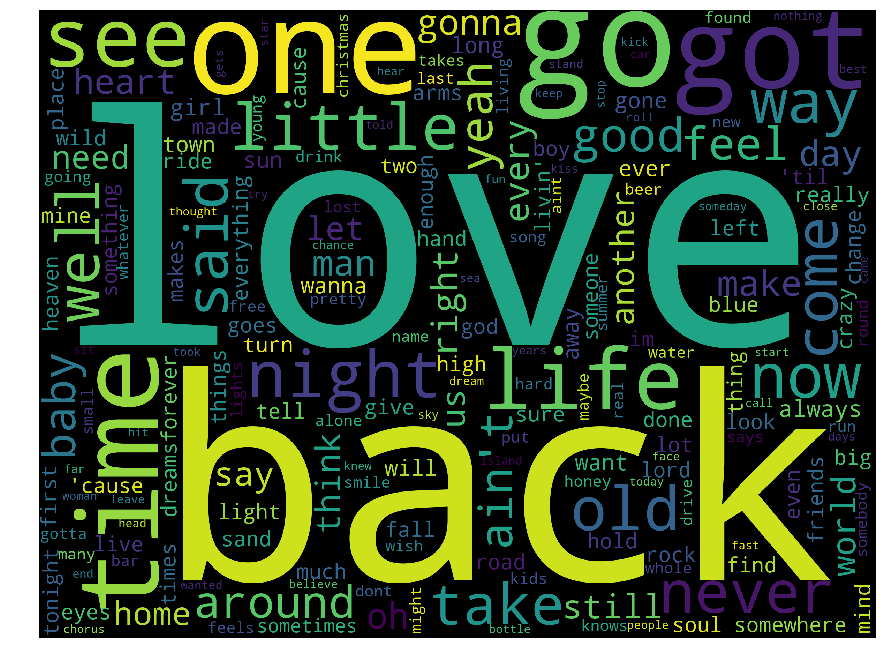

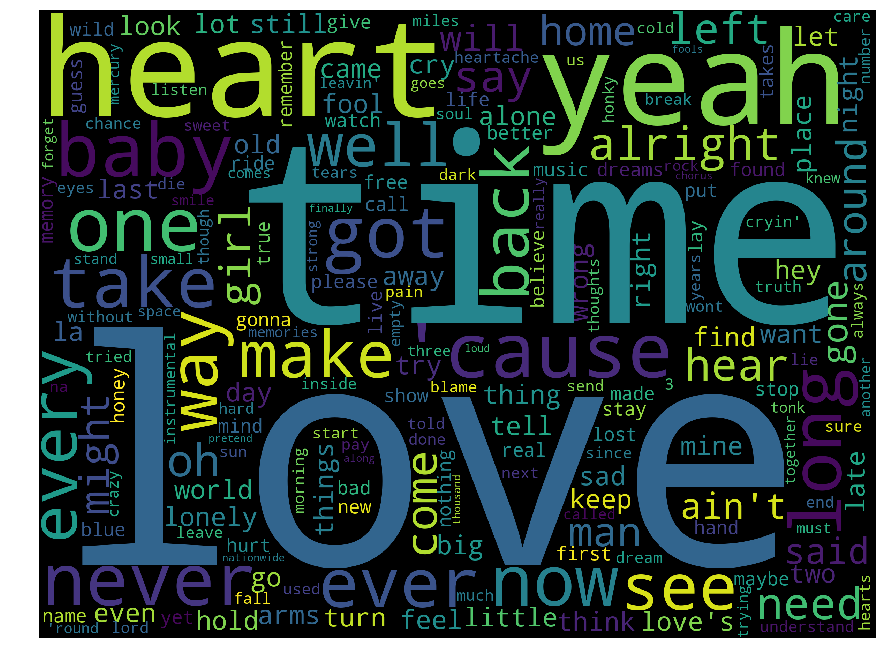

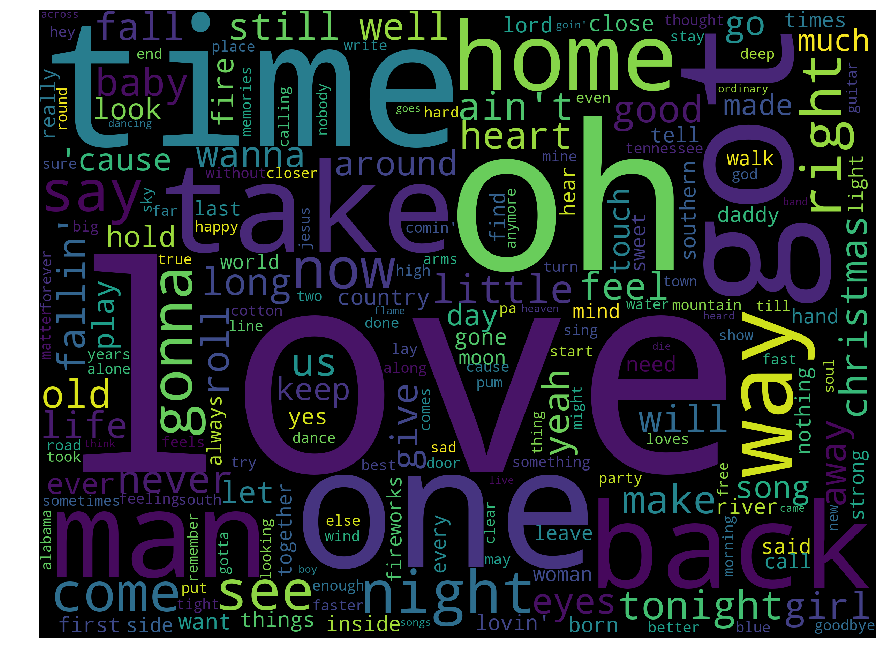

In [103]:
plot_word_cloud(chesney_fd.most_common(200), "chesney-wordcloud-all.png")
plot_word_cloud(yoakam_fd.most_common(200), "yoakam-wordcloud-all.png")
plot_word_cloud(alabama_fd.most_common(200), "alabama-wordcloud-all.png")

In [104]:
bands = ["Kenny Chesney", "Dwight Yoakam", "Alabama"]

three_band_fd = FreqDist(get_words(" ".join(lyricFrame[lyricFrame.artist.isin(bands)].lyrics.values)))

def get_log_likelihood(freq1, combined_freq):
    n_doc = sum(freq1.values())
    n_corpus = sum(combined_freq.values())
    logl = {}
    for w in freq1.keys():
        E_w = n_doc * (combined_freq[w] / float(n_corpus))
        logl[w] = (freq1[w] * np.log( (freq1[w]/E_w) ))    
    return logl

chesney_ll = get_log_likelihood(chesney_fd, three_band_fd)
yoakam_ll = get_log_likelihood(yoakam_fd, three_band_fd)
alabama_ll = get_log_likelihood(alabama_fd, three_band_fd)


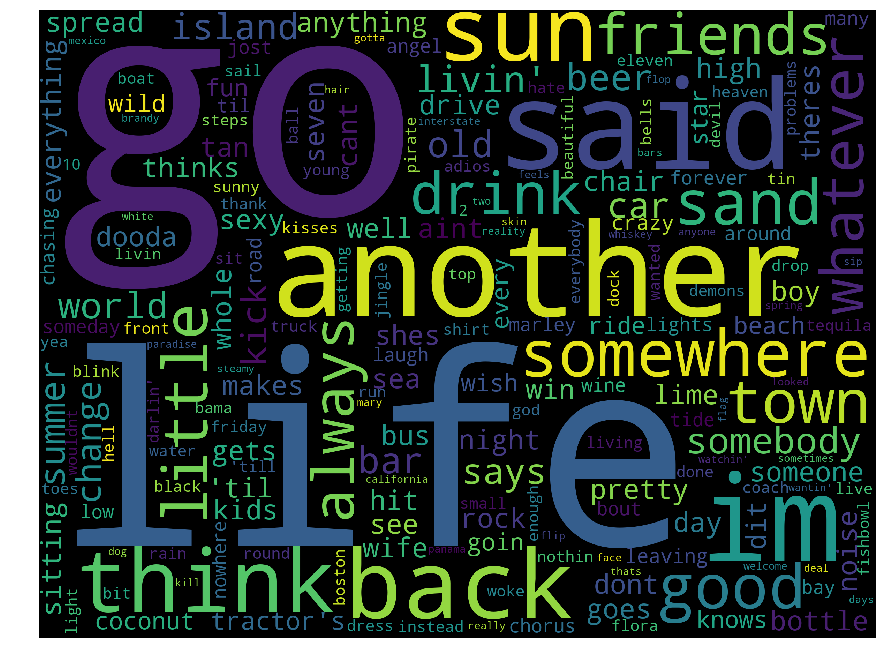

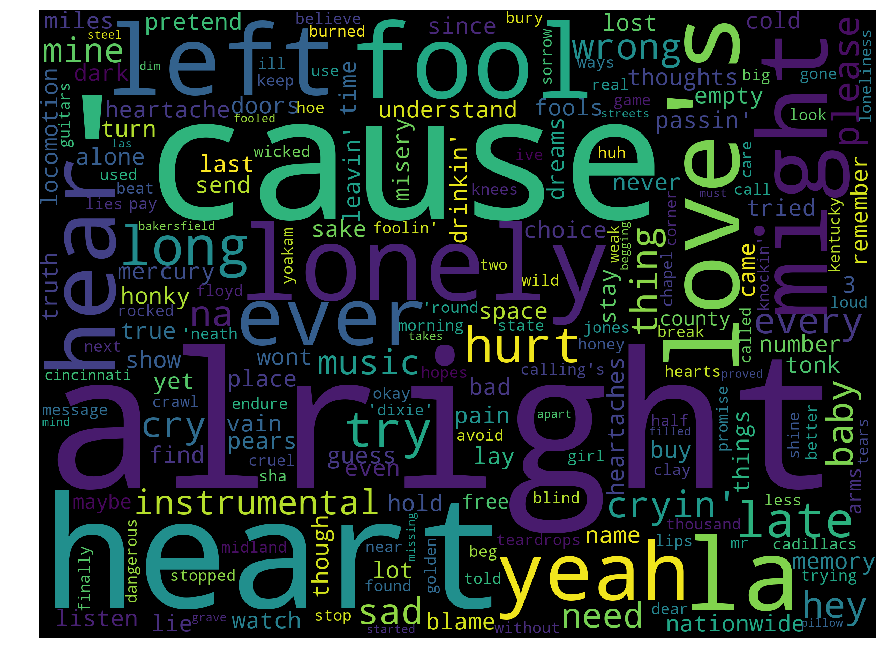

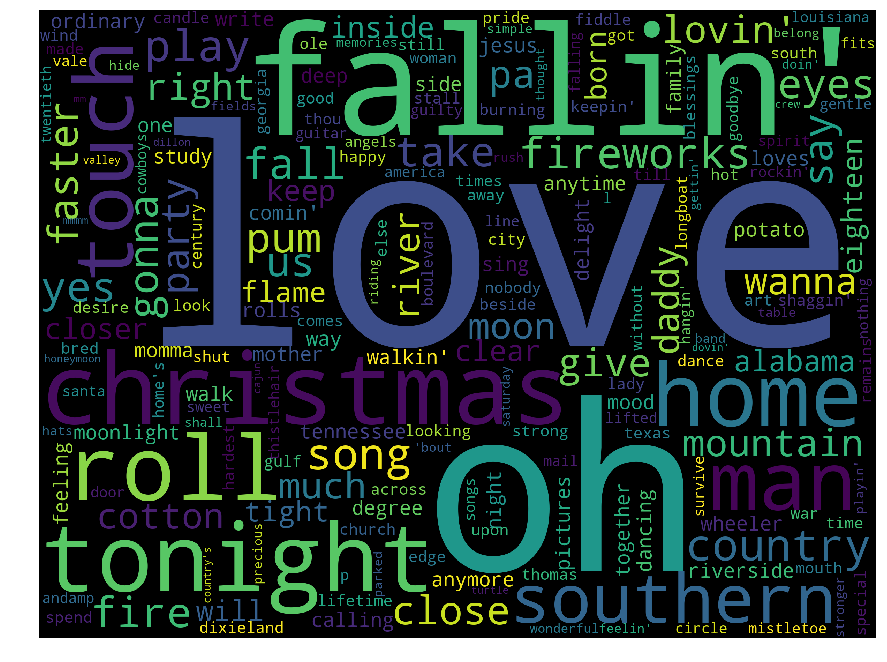

In [105]:
plot_word_cloud(sorted(chesney_ll.items(), key=lambda x:-x[1])[:200], "chesney-wordcloud-ll.png")
plot_word_cloud(sorted(yoakam_ll.items(), key=lambda x:-x[1])[:200], "yoakam-wordcloud-ll.png")
plot_word_cloud(sorted(alabama_ll.items(), key=lambda x:-x[1])[:200], "alabama-wordcloud-ll.png")

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

stop_words = ENGLISH_STOP_WORDS.union(tokenizerPM.CHARACTERS_TO_SPLIT)

vectorizer = TfidfVectorizer(
    stop_words=stop_words,
    lowercase=True,
    max_df=0.25,
    min_df=0.0005,
    ngram_range=(1,2),
    tokenizer=tokenizerPM.tokenize_strip_non_words,
    norm=None,
    smooth_idf=True
)

lyricFrame["vectors_unnormalised"] = list(vectorizer.fit_transform(lyricFrame.lyrics.values).toarray())

In [107]:
def normalise(vec):
    return vec / np.dot(vec,vec)

def combine_vectors(vectors):
    return normalise(np.sum(vectors, axis=0))

lyricFrame["vectors"] = lyricFrame.vectors_unnormalised.apply(normalise)

band_vectors = (
    lyricFrame
    .groupby("artist")
    .vectors
    .apply(combine_vectors)
)

In [108]:
from scipy.spatial.distance import cosine as cs

bands = lyricFrame.artist.unique()
   
def important_words(vec, n):
    return sorted(zip(vectorizer.get_feature_names(), vec), key=lambda x:x[1], reverse=True)[:n]

def most_representative_songs(vec, n):
    df = lyricFrame.copy()
    df["dist"] = df.vectors.apply(lambda x: cs(vec, x))
    df.drop_duplicates(["artist", "song"], inplace=True)
    df.sort_values("dist", inplace=True, ascending=True)
    return df[:n]

def most_representative_bands(vec, n):
    df = band_vectors.reset_index().copy()
    df["dist"] = df.vectors.apply(lambda x: cs(vec, x))
    df.sort_values("dist", inplace=True, ascending=True)
    return df[:n]

In [109]:
important_words(band_vectors.loc["Eric Church"], 10)

[(u"an'", 1.3778263290711688),
 (u"ain't", 1.1373220846119212),
 (u'damn', 0.96660232912370303),
 (u'hell', 0.9629493474184595),
 (u"i'd", 0.89397514999437577),
 (u'man', 0.87616803859437398),
 (u'boots', 0.79044786956787483),
 (u'gone', 0.7089457688506775),
 (u"she's", 0.64407428080192342),
 (u'left', 0.63957375499927638)]

In [110]:
similar_bands = []
for band in ["Cole Swindell", "Alan Jackson", "Canaan Smith", "Garth Brooks", "Eric Church"]:
    vec = band_vectors.loc[band]
    sim_band = most_representative_bands(vec, 4)
    sim_song = most_representative_songs(vec, 4)
    sim_words = important_words(vec, 5)
    similar_bands.append([
        band, 
        ", ".join(sim_band.artist.values),
        ", ".join(sim_song.song.values),
        ", ".join([i[0] for i in sim_words])
    ])

In [111]:
print(list_to_markdown_table(similar_bands, ["Band", "Nearby Bands", "Nearby Songs", "Important words"]))

Band|Nearby Bands|Nearby Songs|Important words
---|---|---|---
Cole Swindell|Cole Swindell, Luke Bryan, Blake Shelton, Toby Keith|The Back Roads & The Back Row, Let Me See Ya Girl, Brought To You By Beer, Hoppin|wanna, beer, girl, gonna, country
Alan Jackson|Alan Jackson, George Strait, Dolly Parton, Reba McEntire|The Christmas Guest, Who Says You Can't Have It All, I'd Love You All Over Again, Someday|i've, i'll, jesus, can't, i'd
Canaan Smith|Canaan Smith, Florida Georgia Line, Jason Aldean, Toby Keith|One Of Those, Bronco, Love You Like That, Love At First|hell ride, wanna love, american, love hurts, mad
Garth Brooks|Garth Brooks, George Strait, Dolly Parton, Reba McEntire|That Girl Is A Cowboy, That Ol' Wind, The Christmas Guest, She's Every Woman|she's, 'cause, he's, i'd, ain't
Eric Church|Eric Church, Toby Keith, Tim McGraw, Trace Adkins|Lotta Boot Left To Fill, A Lot Of Boot Left To Fill, Cold One, Hungover & Hard Up|an', ain't, damn, hell, i'd



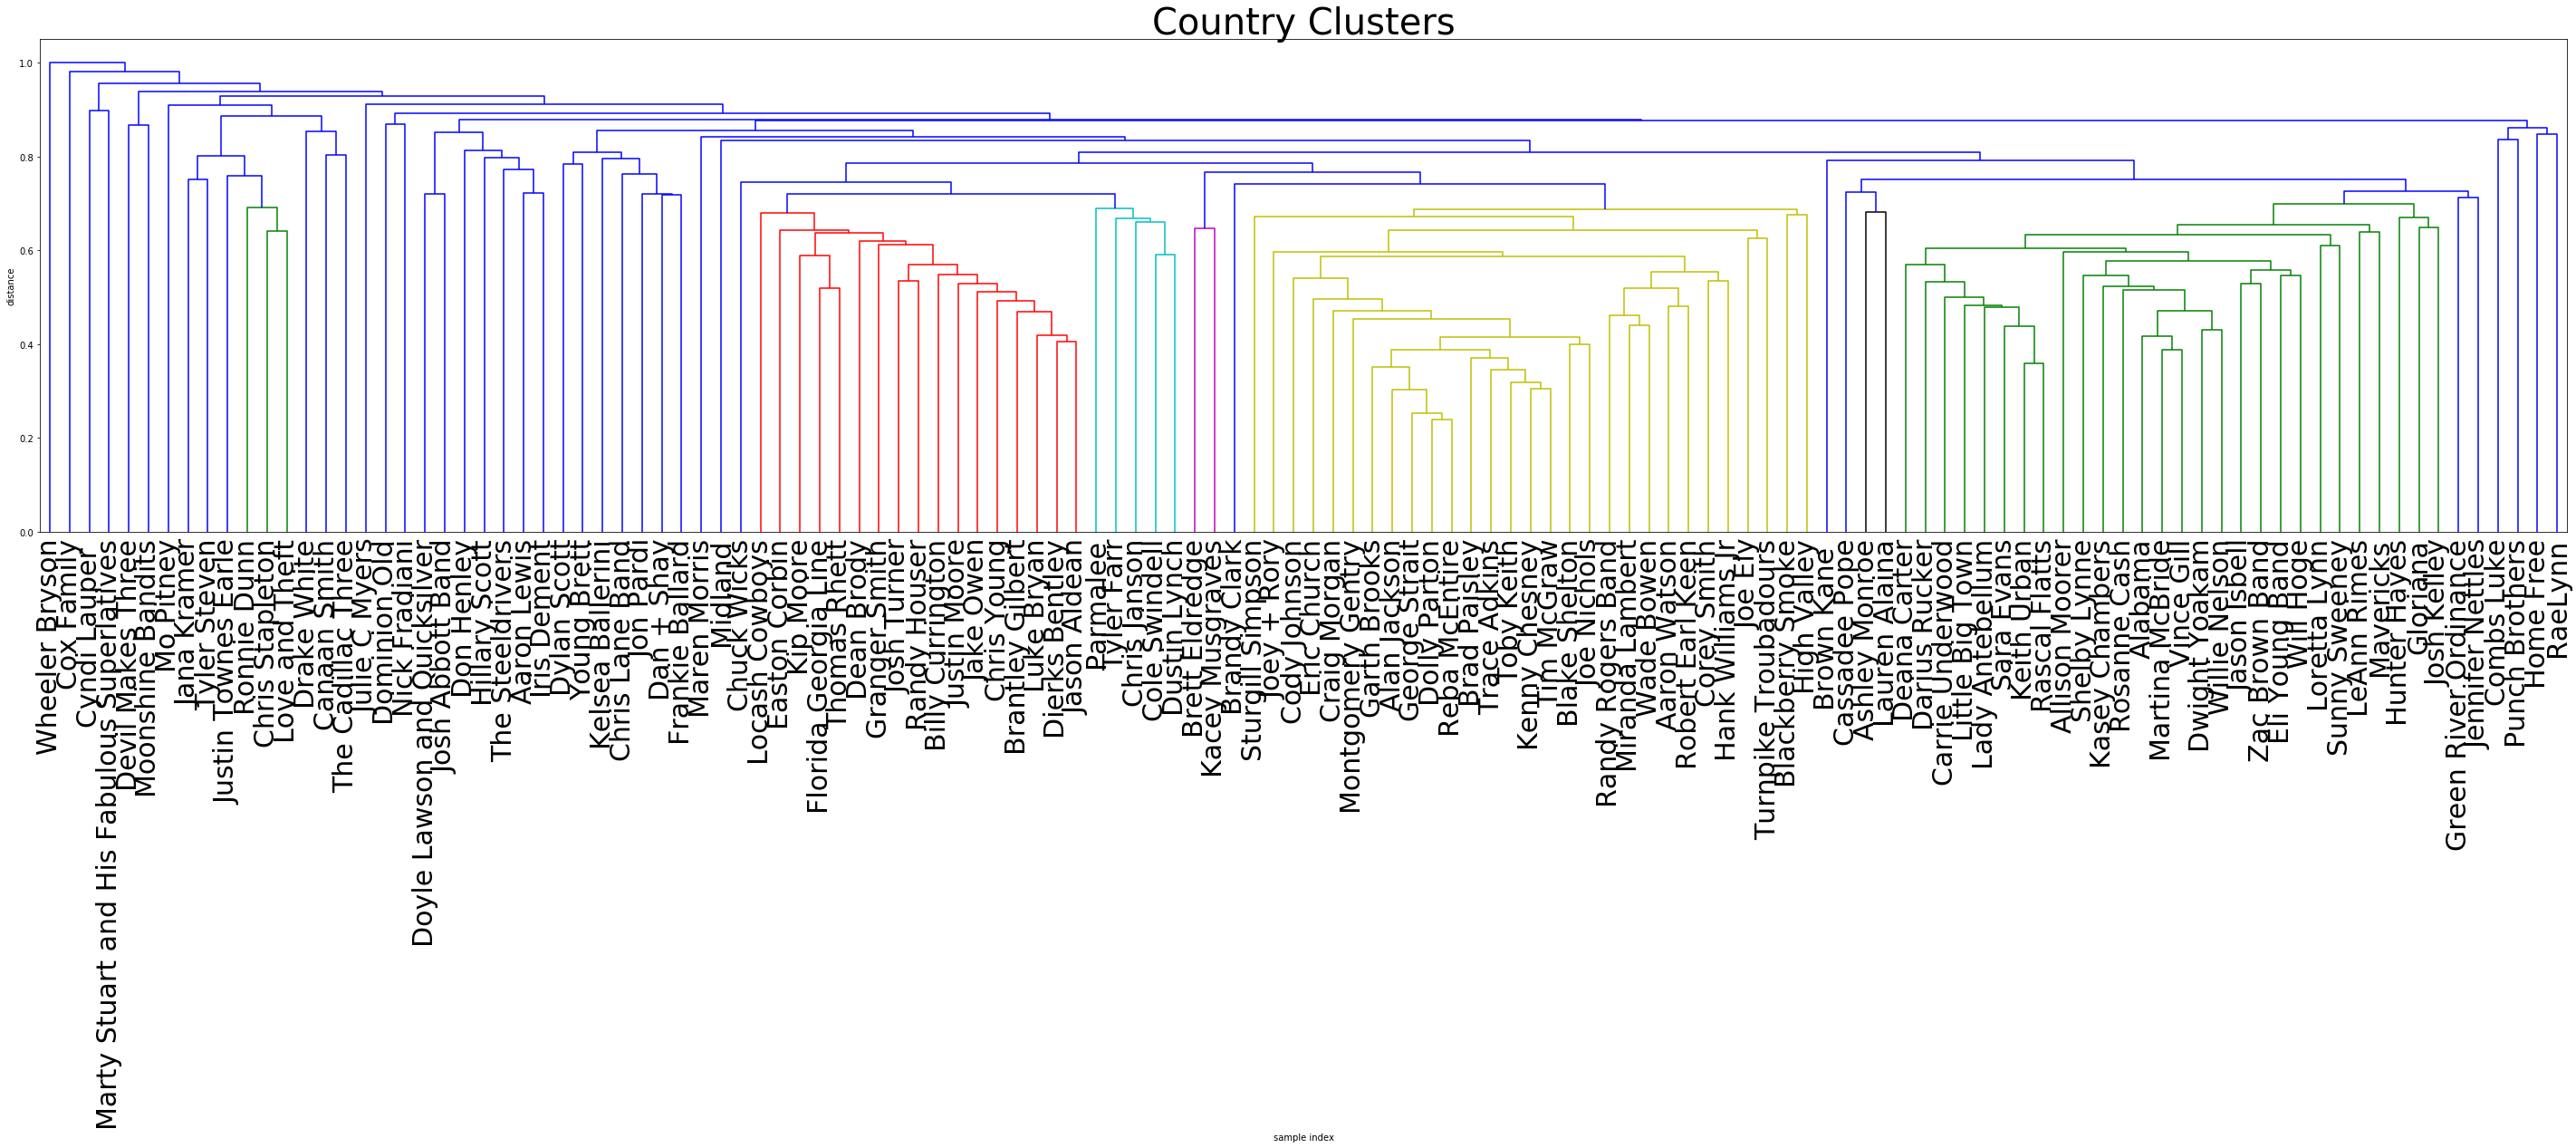

In [113]:
from scipy.cluster.hierarchy import dendrogram, linkage, to_tree, fcluster

Z = linkage(np.stack(list(band_vectors.values)), method='complete', metric="cosine")

n_clusters = fcluster(Z, 0.57, criterion='distance')

plt.figure(figsize=(50, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=30.,  # font size for the x axis labels
    labels=band_vectors.index.values
)
plt.title("Country Clusters", fontsize=40)
plt.xticks(rotation=90)

plt.savefig("country-clustering.png", bbox_inches='tight')